In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Recommendation System - Assignment/Electronic_dataset.csv')

In [5]:
df.head()

,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    500000 non-null  object 
 1   prod_id    500000 non-null  object 
 2   ratings    500000 non-null  float64
 3   timestamp  500000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.3+ MB


In [7]:
df.user_id.nunique()

448368

In [8]:
# Total ratings are 500000, out of which unique Users are 448368. This means few thousand users have rated multiple products.

In [9]:
df.prod_id.nunique()

130138

In [10]:
# Total catalogue is of 130138 products from which we can recommend few to each User.

In [11]:
df.groupby('ratings').count()['prod_id']

ratings
1.0     57452
2.0     29251
3.0     40382
4.0     95089
5.0    277826
Name: prod_id, dtype: int64

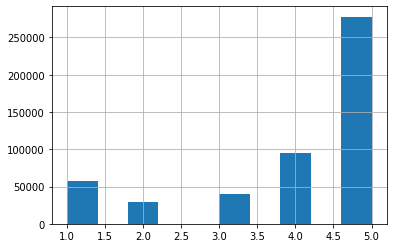

In [12]:
df.ratings.hist()

In [13]:
# Clearly most ratings are towards the higher end (4 and 5).

In [14]:
df.drop('timestamp',axis=1,inplace=True)
df.head()
# Dropping timestamp column.

,user_id,prod_id,ratings
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0
2,A1SINU2I4IOPNU,B000GBO9IM,4.0
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0


# Popularity Based Recommendation System

In [15]:
df_mean_rating = df.drop('user_id',axis=1)
df_mean_rating.info()
# Dropping user id column from orignal dataframe and copying into a new dataframe since it is not needed in popularity based model.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   prod_id  500000 non-null  object 
 1   ratings  500000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.6+ MB


In [16]:
df_mean_rating_grouped = df_mean_rating.groupby('prod_id').mean()
df_mean_rating_grouped.head()

,ratings
prod_id,
0439886341,1.0
0528881469,5.0
0594012015,5.0
0594033926,5.0
0594451647,5.0


In [17]:
# The above code will take out the average rating of each product from the dfferent ratings provided by multiple Users.

In [18]:
df_mean_rating_grouped.sort_values(by='ratings',ascending=False).head(10)

,ratings
prod_id,
BT008G3W52,5.0
B003GRJTO2,5.0
B003GKTGYC,5.0
B003GM8VH8,5.0
B003GMATXW,5.0
B003GMBLZC,5.0
B003GMDHDG,5.0
B003GMGLFW,5.0
B003GMRUDY,5.0


### The above 10 products have the highest mean rating of 5.0 and can be recommended to all Users as per the Popularity Based Recommendation Model.

# Collaborative Filtering based Recommendation System

In [19]:
!pip install scikit-surprise
# Installing surprise package.

     |████████████████████████████████| 11.8MB 253kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670909 sha256=d1c2c095720c992d9d7d2822438a4f567e7eae5fde66bf64c57e0fbe3a025b58
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [20]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
# Importing all essential utilities from surprise library.
reader = Reader(rating_scale=(1,5))
# As we're loading a custom dataset, we need to define a reader.

In [21]:
data = Dataset.load_from_df(df,reader)
# Loading the data from Original Dataset into surprise format.

In [22]:
data.df.head()
# Viewing the data in surprise dataframe format.

,user_id,prod_id,ratings
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0
2,A1SINU2I4IOPNU,B000GBO9IM,4.0
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0


In [23]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30,random_state=10)
# Splitting the data randomly into a train and test dataset in 70/30 ratio.

In [24]:
from surprise import SVD
algo = SVD()
algo.fit(trainset)
# We're using the famous SVD algorithm.

In [49]:
test_prediction = algo.test(testset)
# Trained the algorithm on the trainset, and now predicting ratings for the testset.

In [50]:
test_prediction[:11]
# Viewing head of the predictions list.

[Prediction(uid='AI645RG68FICR', iid='B0044YU60M', r_ui=4.0, est=4.0857587984724315, details={'was_impossible': False}),
 Prediction(uid='A2R51BIPZL6QTC', iid='B0015DYMVO', r_ui=4.0, est=4.073906823789242, details={'was_impossible': False}),
 Prediction(uid='A2IMZNPSJGB2HQ', iid='B00GUBPBK2', r_ui=4.0, est=4.358209123609516, details={'was_impossible': False}),
 Prediction(uid='AEBWNCPBV5QJY', iid='B006V9AUMC', r_ui=5.0, est=4.327215511647241, details={'was_impossible': False}),
 Prediction(uid='A3KQP2DIF1KTNZ', iid='B00006B70R', r_ui=5.0, est=4.029973337612025, details={'was_impossible': False}),
 Prediction(uid='A3TWPDFI1DWDSV', iid='B007IV7KRU', r_ui=5.0, est=4.491353902795726, details={'was_impossible': False}),
 Prediction(uid='A3OLZ4UC2M4V29', iid='B00FEE7B1I', r_ui=3.0, est=3.961973420215077, details={'was_impossible': False}),
 Prediction(uid='A2Q1KKC6XIY83V', iid='B001ISZT90', r_ui=5.0, est=4.097049679532905, details={'was_impossible': False}),
 Prediction(uid='A2JIUZPZ5F36X6',

In [27]:
from surprise import accuracy
accuracy.rmse(test_prediction)
accuracy.mae(test_prediction)
# Computing the error (RMSE) on the preditions made by the model on test data. 

RMSE: 1.3426
MAE:  1.0625


1.0624939799467634

In [28]:
# We can also run a k-fold cross-validaton for more meaningful RMSE score.

In [29]:
cross_validate(algo, data, measures=['RMSE','MAE'], cv=5, verbose=True)
# Here, we are doing a 5-fold cross-validation and publishing the RMSE.

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3368  1.3401  1.3362  1.3395  1.3415  1.3388  0.0020  
MAE (testset)     1.0576  1.0599  1.0582  1.0612  1.0616  1.0597  0.0016  
Fit time          25.90   26.23   26.12   26.20   26.13   26.11   0.12    
Test time         0.63    0.63    0.63    0.67    0.62    0.64    0.02    


{'fit_time': (25.895623207092285,
  26.22553539276123,
  26.11577844619751,
  26.19762921333313,
  26.125686407089233),
 'test_mae': array([1.05756083, 1.05987386, 1.05819792, 1.06116507, 1.06159896]),
 'test_rmse': array([1.33675138, 1.34005622, 1.33623918, 1.33945909, 1.34147699]),
 'test_time': (0.6270902156829834,
  0.6278011798858643,
  0.6314640045166016,
  0.6690652370452881,
  0.620227575302124)}

### We will now write a function to generate n recommendations for user x. (n, x would be parameterized)

In [52]:
from collections import defaultdict

def get_top_n(predictions, userid, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
      if uid == userid:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [43]:
data.df.user_id.unique()
# List of User IDs

array(['A3L1GVWVJKWZZS', 'A08831071BVKZMKNCPI5S', 'A1SINU2I4IOPNU', ...,
       'A23WSQC26QEFLC', 'ARHZCDAH1UTPN', 'A9XU2MMIWGZBT'], dtype=object)

In [55]:
top_n = get_top_n(test_prediction,userid='ADLVFFE4VBT8',n=5)
# This piece of code will return the top 'n' recommendations for any userid we pass as an argument.

In [56]:
top_n
# Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products to the User 'A3L1GVWVJKWZZS'.

defaultdict(list,
            {'ADLVFFE4VBT8': [('B001XURP7W', 5),
              ('B0002L5R78', 4.885239702435183),
              ('B0049MOJ2U', 4.75745291775182),
              ('B008CP5R8K', 4.750084827714578),
              ('B003O8682Y', 4.700404957147355)]})

### The above 5 products have the highest predicted rating as per SVD model and can be recommended to a single User with Id 'A3L1GVWVJKWZZS' as per the Collaborative Filtering Based Recommendation Model. The same can now be replicated for all User Id's.

In [30]:
df_pred = pd.DataFrame (test_prediction)
df_pred

,uid,iid,r_ui,est,details
0,AI645RG68FICR,B0044YU60M,4.0,4.227934,{'was_impossible': False}
1,A2R51BIPZL6QTC,B0015DYMVO,4.0,4.122455,{'was_impossible': False}
2,A2IMZNPSJGB2HQ,B00GUBPBK2,4.0,4.425003,{'was_impossible': False}
3,AEBWNCPBV5QJY,B006V9AUMC,5.0,4.020071,{'was_impossible': False}
4,A3KQP2DIF1KTNZ,B00006B70R,5.0,3.940548,{'was_impossible': False}
...,...,...,...,...,...
149995,A2Z9RCXP9XN3NF,B0082E9K7U,5.0,4.725947,{'was_impossible': False}
149996,A5FD5PMG5R3ZZ,B003FGWF04,5.0,3.481425,{'was_impossible': False}
149997,A2Z0KHMWP8QOEU,B0067US1R6,5.0,4.547531,{'was_impossible': False}
149998,ANRQOPX7ZBW07,B009CQNPYQ,1.0,3.607545,{'was_impossible': False}


In [40]:
df_pred['uid'].value_counts()

ADLVFFE4VBT8      15
A680RUE1FDO8B     12
A6FIAB28IS79      11
A2AY4YUOX2N1BQ     9
A231WM2Z2JL0U3     9
                  ..
A132EVKK37UXF4     1
A243G9RX9O5WBT     1
A3JI3ZDQGN9LVC     1
A2MH6TL68MSZDU     1
A6QYBUOZ2TFHI      1
Name: uid, Length: 144000, dtype: int64

In [41]:
df_pred[df_pred['uid'] == 'ADLVFFE4VBT8']

,uid,iid,r_ui,est,details
1981,ADLVFFE4VBT8,B007BZ1092,2.0,4.561461,{'was_impossible': False}
17989,ADLVFFE4VBT8,B000M4XMGI,5.0,4.592181,{'was_impossible': False}
31281,ADLVFFE4VBT8,B0002L5R78,5.0,4.913945,{'was_impossible': False}
67298,ADLVFFE4VBT8,B000VMU9VC,5.0,4.099727,{'was_impossible': False}
67454,ADLVFFE4VBT8,B003TNMABW,5.0,4.099053,{'was_impossible': False}
87833,ADLVFFE4VBT8,B005G0CUP2,3.0,4.253015,{'was_impossible': False}
99603,ADLVFFE4VBT8,B00D5EO27U,4.0,4.351399,{'was_impossible': False}
108204,ADLVFFE4VBT8,B001CCGYJG,4.0,4.351399,{'was_impossible': False}
110046,ADLVFFE4VBT8,B001XURP7W,5.0,4.642886,{'was_impossible': False}
111324,ADLVFFE4VBT8,B000OH56ZS,4.0,3.517258,{'was_impossible': False}


In the final prediction, we have used the User Id 'ADLVFFE4VBT8' since he/she had reviewed multiple products and hence has many recommendations to choose from.

We can also have a situation where total number of recommendations are less than the desried 5. This is because the user hasn't provided enough data about their likings to be recommendenrecommended enough products. Let's take a look at such an example below.

In [57]:
top_n_2 = get_top_n(test_prediction,userid='AI645RG68FICR',n=5)
# This piece of code will return the top 'n' recommendations for any userid we pass as an argument.

In [58]:
top_n_2

defaultdict(list, {'AI645RG68FICR': [('B0044YU60M', 4.0857587984724315)]})

Since the user had initially reviewed/rated only one product, they are shown/recommended a single similar product in this case.

In [59]:
df_pred['uid'].value_counts()

ADLVFFE4VBT8      15
A680RUE1FDO8B     12
A6FIAB28IS79      11
A2AY4YUOX2N1BQ     9
A231WM2Z2JL0U3     9
                  ..
A132EVKK37UXF4     1
A243G9RX9O5WBT     1
A3JI3ZDQGN9LVC     1
A2MH6TL68MSZDU     1
A6QYBUOZ2TFHI      1
Name: uid, Length: 144000, dtype: int64

This tell us that the bias we saw earlier in the ratings data that many Users have rated a single product and usually rated highly (4 or 5), we are not able to fetch quality recommndations for all users. Only a few of them have multiple recommendations, whereas the majority Users get only 1 or 2 recommedations. 